In [3]:
import numpy as np
import pandas as pd

In [4]:
df=pd.read_csv("Admission_Predict.csv")

In [5]:
df.head(10)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,1
1,2,324,107,4,4.0,4.5,8.87,1,1
2,3,316,104,3,3.0,3.5,8.00,1,0
3,4,322,110,3,3.5,2.5,8.67,1,1
4,5,314,103,2,2.0,3.0,8.21,0,0
5,6,330,115,5,4.5,3.0,9.34,1,1
6,7,321,109,3,3.0,4.0,8.20,1,1
7,8,308,101,2,3.0,4.0,7.90,0,0
8,9,302,102,1,2.0,1.5,8.00,0,0
9,10,323,108,3,3.5,3.0,8.60,0,0


In [6]:
df.tail()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
395,396,324,110,3,3.5,3.5,9.04,1,1
396,397,325,107,3,3.0,3.5,9.11,1,1
397,398,330,116,4,5.0,4.5,9.45,1,1
398,399,312,103,3,3.5,4.0,8.78,0,0
399,400,333,117,4,5.0,4.0,9.66,1,1


In [7]:
df.isnull().sum()# there is no missing value

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 28.3 KB


In [9]:
# outlier treatment 
# transformation
# scaling

#for logistic regression  the model is deviated

out = df['Chance of Admit']
inp = df.drop(['Chance of Admit', 'Serial No.'], axis=1)


In [10]:
# we need to check multicoliniarity it means that how two input variable is associated with output variable
from statsmodels.stats.outliers_influence import variance_inflation_factor
# vif is the factor throgh which we can understand multicoloniarity

In [11]:
[variance_inflation_factor(inp.values, i) for i in range(inp.shape[1])]

[np.float64(1438.4517892185577),
 np.float64(1349.7469482740144),
 np.float64(22.14370533096426),
 np.float64(38.05017677579483),
 np.float64(38.411722253881706),
 np.float64(1080.4911794302955),
 np.float64(2.8599378196407557)]

In [12]:
inp_sc = inp - inp.mean()
inp_sc

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,20.1925,10.59,0.9125,1.1,1.0475,1.051075,0.4525
1,7.1925,-0.41,0.9125,0.6,1.0475,0.271075,0.4525
2,-0.8075,-3.41,-0.0875,-0.4,0.0475,-0.598925,0.4525
3,5.1925,2.59,-0.0875,0.1,-0.9525,0.071075,0.4525
4,-2.8075,-4.41,-1.0875,-1.4,-0.4525,-0.388925,-0.5475
...,...,...,...,...,...,...,...
395,7.1925,2.59,-0.0875,0.1,0.0475,0.441075,0.4525
396,8.1925,-0.41,-0.0875,-0.4,0.0475,0.511075,0.4525
397,13.1925,8.59,0.9125,1.6,1.0475,0.851075,0.4525
398,-4.8075,-4.41,-0.0875,0.1,0.5475,0.181075,-0.5475


In [13]:
[variance_inflation_factor(inp_sc.values, i) for i in range(inp_sc.shape[1])]

[np.float64(4.61551616678161),
 np.float64(4.288959013746899),
 np.float64(2.9196056618253396),
 np.float64(3.075503721954348),
 np.float64(2.431258484869441),
 np.float64(5.207402545736424),
 np.float64(1.543311901150288)]

In [14]:
# if we have to drop 5.2 we need to know the column name corresponding to it for that we need to store it in the dataframe

vif_tab = pd.DataFrame()
vif = [variance_inflation_factor(inp_sc.values, i) for i in range(inp_sc.shape[1])]
vif_tab['VIF']=vif
vif_tab['feature'] = inp_sc.columns
vif_tab

#since the vif of cgpa is greater than 0.5 and it is important feature so it is not recomended to drop the value


,VIF,feature
0,4.615516,GRE Score
1,4.288959,TOEFL Score
2,2.919606,University Rating
3,3.075504,SOP
4,2.431258,LOR
5,5.207403,CGPA
6,1.543312,Research


In [15]:
import statsmodels.api as sm

In [16]:
inp_constant = sm.add_constant(inp_sc)
mod=sm.Logit(out , inp_constant)
logi=mod.fit()
logi.summary()

Optimization terminated successfully.
         Current function value: 0.256048
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:        Chance of Admit   No. Observations:                  400
Model:                          Logit   Df Residuals:                      392
Method:                           MLE   Df Model:                            7
Date:                Tue, 21 Jan 2025   Pseudo R-squ.:                  0.6279
Time:                        06:20:58   Log-Likelihood:                -102.42
converged:                       True   LL-Null:                       -275.26
Covariance Type:            nonrobust   LLR p-value:                 1.040e-70
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.4812      0.182     -2.644      0.008      -0.838      -0.124
GRE Score             0.0469      0.033      1.418      0.156      -0.018       0.112
TOEFL Score           0.0852      0.058      1.469      0.142      -0.028       0.199
University Rating     0.3308      0.261      1.267      0.205      -0.181       0.842
SOP                   0.4179      0.330      1.267      0.205      -0.229       1.065
LOR                   0.3900      0.303      1.287      0.198      -0.204       0.984
CGPA                  3.5988      0.739      4.873      0.000       2.151       5.046
Research              0.8270      0.398      2.078      0.038       0.047       1.607
=====================================================================================
"""

In [17]:
inp = sm.add_constant(inp)

mod = sm.Logit(out, inp)
logi = mod.fit()
logi.summary()

Optimization terminated successfully.
         Current function value: 0.256048
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:        Chance of Admit   No. Observations:                  400
Model:                          Logit   Df Residuals:                      392
Method:                           MLE   Df Model:                            7
Date:                Tue, 21 Jan 2025   Pseudo R-squ.:                  0.6279
Time:                        06:20:58   Log-Likelihood:                -102.42
converged:                       True   LL-Null:                       -275.26
Covariance Type:            nonrobust   LLR p-value:                 1.040e-70
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -59.6838      9.186     -6.497      0.000     -77.689     -41.679
GRE Score             0.0469      0.033      1.418      0.156      -0.018       0.112
TOEFL Score           0.0852      0.058      1.469      0.142      -0.028       0.199
University Rating     0.3308      0.261      1.267      0.205      -0.181       0.842
SOP                   0.4179      0.330      1.267      0.205      -0.229       1.065
LOR                   0.3900      0.303      1.287      0.198      -0.204       0.984
CGPA                  3.5988      0.739      4.873      0.000       2.151       5.046
Research              0.8270      0.398      2.078      0.038       0.047       1.607
=====================================================================================
"""

In [18]:
# for one unit increase in cgpa the ln of odd of addmission is incresed by 3.5 by keeping all other freature constant

In [19]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: statsmodels in c:\users\1149p\appdata\local\packages\pythonsoftwarefoundation.python.3.11_qbz5n2kfra8p0\localcache\local-packages\python311\site-packages (0.14.4)




[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\1149p\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [20]:
inp_sc1 = inp_sc.copy()
while(len(inp_sc1.columns)>0):
    inpc = sm.add_constant(inp_sc1)
    mod = sm.Logit(out, inpc)
    mod1 = mod.fit()
    f = mod1.pvalues[1: ].idxmax()
    if mod1.pvalues[1: ] .max() > 0.05:
        inp_sc1 = inp_sc1.drop(f,axis=1)
    else:
        break
print('The final feature are ', inp_sc1.columns)

Optimization terminated successfully.
         Current function value: 0.256048
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.258075
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.260363
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.265162
         Iterations 8
The final feature are  Index(['TOEFL Score', 'LOR', 'CGPA', 'Research'], dtype='object')


In [21]:
logi.pvalues[1:].idxmax()

'SOP'

In [22]:
inpc = sm.add_constant(inp_sc1)

mod = sm.Logit(out, inpc)
logi = mod.fit()
logi.summary()

Optimization terminated successfully.
         Current function value: 0.265162
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:        Chance of Admit   No. Observations:                  400
Model:                          Logit   Df Residuals:                      395
Method:                           MLE   Df Model:                            4
Date:                Tue, 21 Jan 2025   Pseudo R-squ.:                  0.6147
Time:                        06:21:04   Log-Likelihood:                -106.06
converged:                       True   LL-Null:                       -275.26
Covariance Type:            nonrobust   LLR p-value:                 5.653e-72
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.4764      0.177     -2.686      0.007      -0.824      -0.129
TOEFL Score     0.1426      0.052      2.763      0.006       0.041       0.244
LOR             0.7109      0.260      2.735      0.006       0.201       1.220
CGPA            4.2239      0.713      5.928      0.000       2.827       5.620
Research        1.0671      0.355      3.004      0.003       0.371       1.763
===============================================================================
"""

In [23]:
mod1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:        Chance of Admit   No. Observations:                  400
Model:                          Logit   Df Residuals:                      395
Method:                           MLE   Df Model:                            4
Date:                Tue, 21 Jan 2025   Pseudo R-squ.:                  0.6147
Time:                        06:21:04   Log-Likelihood:                -106.06
converged:                       True   LL-Null:                       -275.26
Covariance Type:            nonrobust   LLR p-value:                 5.653e-72
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.4764      0.177     -2.686      0.007      -0.824      -0.129
TOEFL Score     0.1426      0.052      2.763      0.006       0.041       0.244
LOR             0.7109      0.260      2.735      0.006       0.201       1.220
CGPA            4.2239      0.713      5.928      0.000       2.827       5.620
Research        1.0671      0.355      3.004      0.003       0.371       1.763
===============================================================================
"""

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
x_train, xtest, ytrain, ytest = train_test_split(inp_sc1, out, test_size=0.3, random_state=48)
logr = LogisticRegression(C=10000000)
logr.fit(x_train, ytrain)
y_pred =logr.predict(xtest)
y_pred
#model has been developed

array([1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0])

In [25]:
#coefficient we will find out to give the model to the user so they can we use it
# we will create the training senerio for the model
coef = pd.DataFrame()
coef['coefficient'] = logr.coef_[0]
coef['feature'] = inp_sc1.columns
coef

,coefficient,feature
0,0.188812,TOEFL Score
1,0.444898,LOR
2,3.868881,CGPA
3,1.282866,Research


In [26]:
# in order to do the prediction p formula we need to apply.
#to find the p value=linear regreession is ln(v0) +ln(v1)+ln(v2)
logr.intercept_

array([-0.59881401])

In [27]:
np.array(ytest)

array([1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0])

In [28]:
from sklearn.metrics import confusion_matrix

In [29]:
confusio_matrix=confusion_matrix(ytest, y_pred)
confusio_matrix

array([[65,  2],
       [12, 41]])

<Axes: >

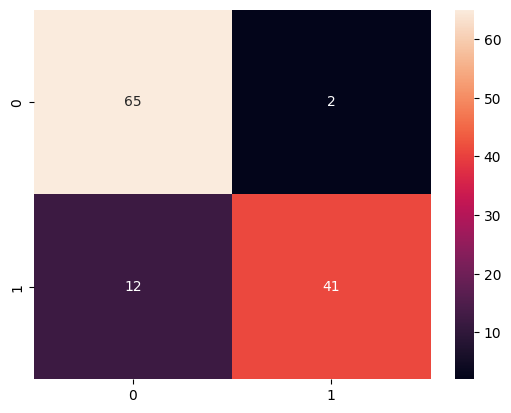

In [30]:
import seaborn as sb
sb.heatmap(confusio_matrix, annot=True)

In [31]:
tp = [1 ,1]
tn = [0, 0]
fp = [0,1]
fn = [1,0]


In [32]:
accuracy = (sum(tp )+ sum(tn))/(sum(tp) + sum(tn) +sum(fp) + sum(fn))
print('Accuracy', accuracy)
rec = sum(tp)/(sum(tp)+ sum(tn))
precission = sum(tp)/(sum(tp) + sum(fp))
print('Precission', precission)

f1_score = (2*precission*rec)/(precission+rec)
print('f1',f1_score)
print('false negative', fn)
print('false positive', fp)

Accuracy 0.5
Precission 0.6666666666666666
f1 0.8
false negative [1, 0]
false positive [0, 1]


In [33]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\1149p\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [34]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\1149p\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [35]:
from sklearn.tree import DecisionTreeClassifier

In [36]:
X_train, X_test , Y_train, Y_test = train_test_split(inp , out, test_size=0.3, random_state=48)

In [37]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=3)

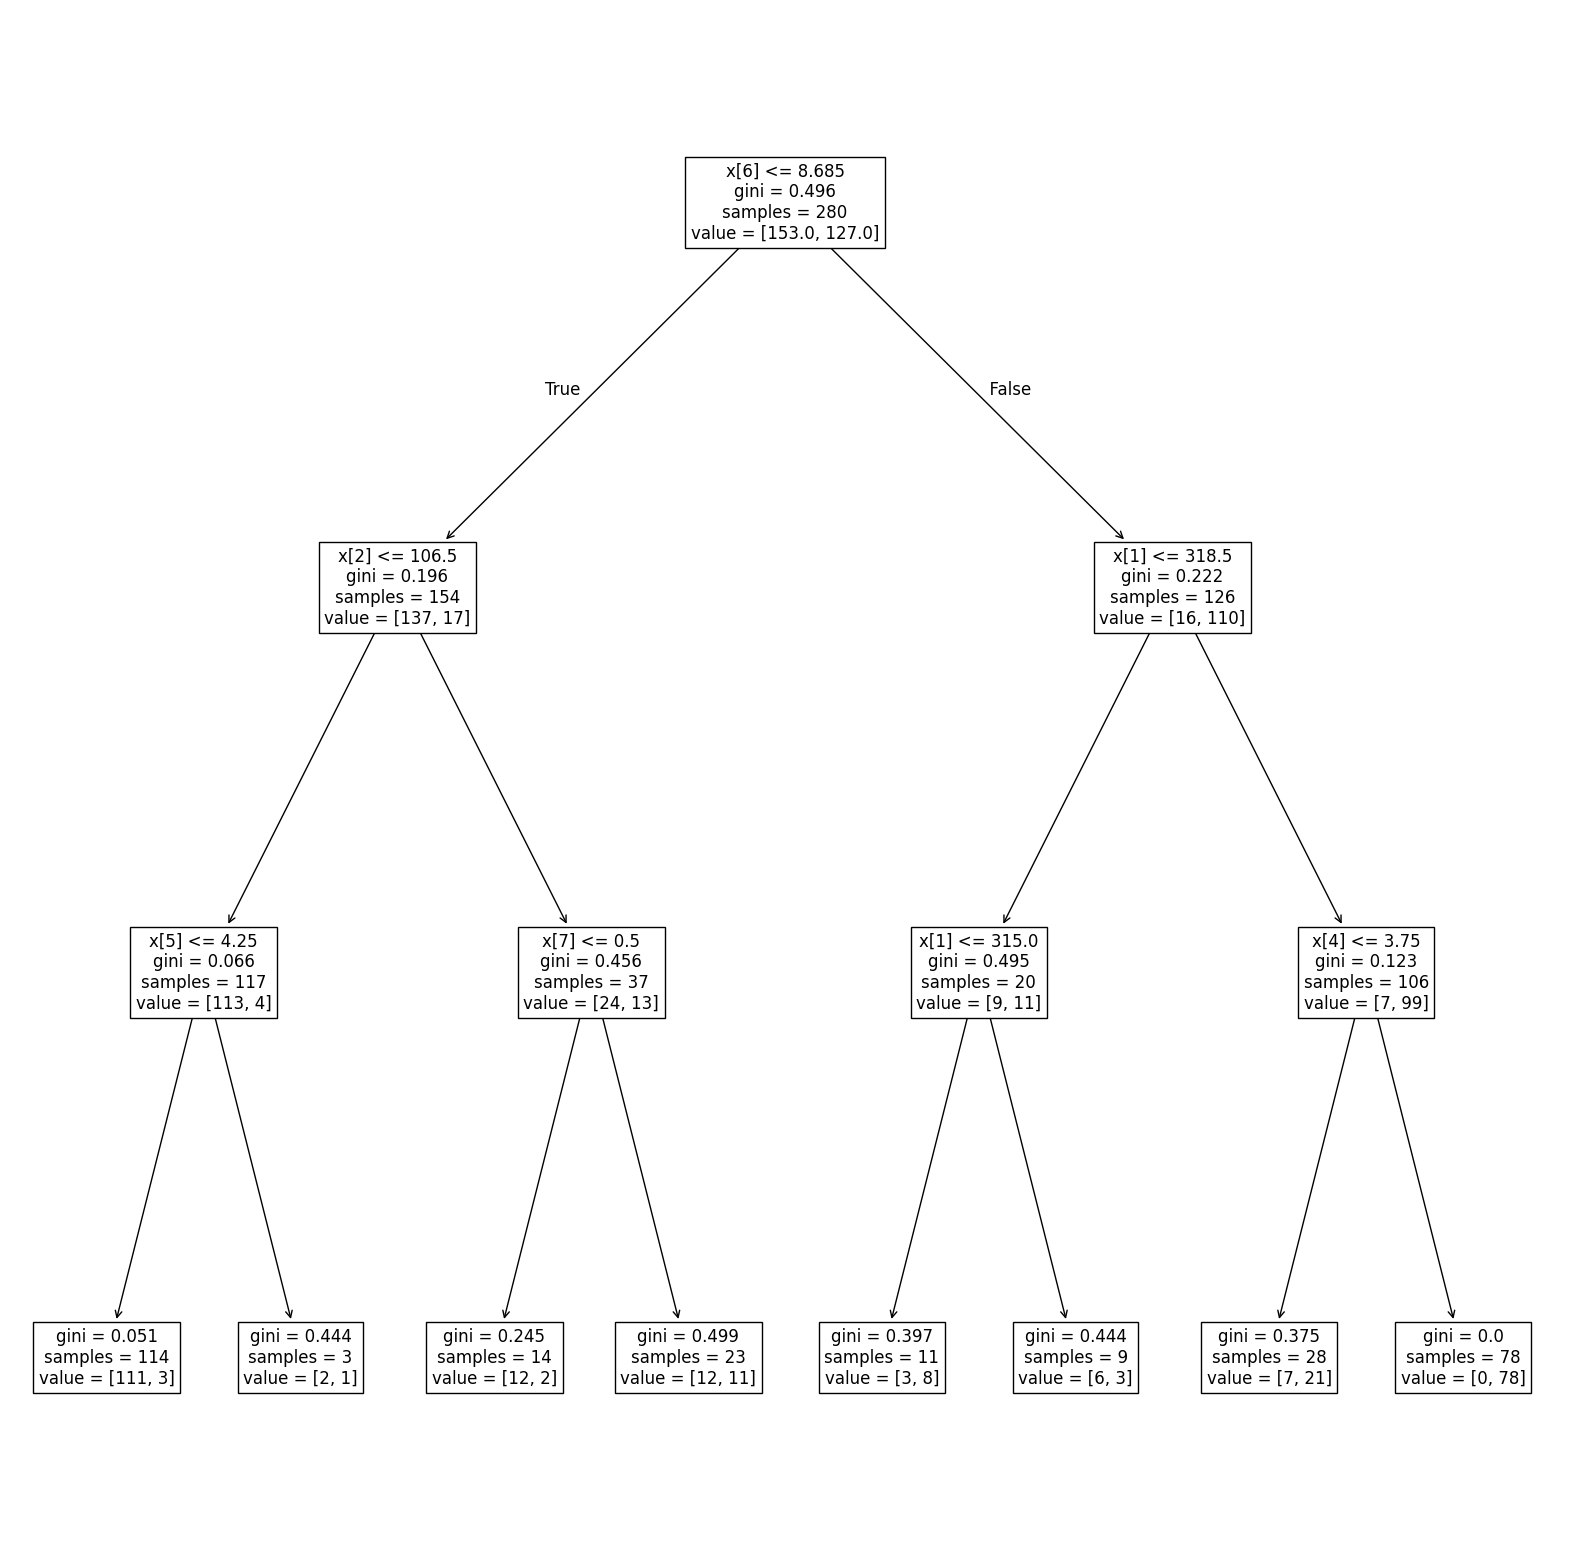

In [38]:
from sklearn import tree
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
tree.plot_tree(dt, fontsize= 12)
plt.show()

In [39]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(dt,inp,out, cv=5, scoring='f1')

print(score)

bias_error = 1- np.mean(score)
variance_error = np.std(score)/np.mean(score)
print('bias_error', bias_error)
print('variance_error', variance_error)


[0.83116883 0.71052632 0.87323944 0.79452055 0.82857143]
bias_error 0.1923946879810685
variance_error 0.06759004055087037


In [40]:
from sklearn.model_selection import GridSearchCV

In [41]:
grid = {'criterion':['gini','entropy'],
        'max_depth': [3,5,6,7,8,9,10],
        'min_samples_leaf': [5,10,15]  
        }
dt= DecisionTreeClassifier()
hyp_mod = GridSearchCV(dt, param_grid=grid, cv=5, scoring='f1')
tune_model =hyp_mod.fit(X_train, Y_train)

In [42]:
tune_model.best_params_

{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 15}

In [43]:
tune_model.best_score_

np.float64(0.8476853929046527)

In [44]:
pd.DataFrame(tune_model.cv_results_).to_csv('resuts.csv', index=None)